<a href="https://colab.research.google.com/github/textnorms/date_text_norm/blob/DS-en/T5_V8_(t5_base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! nvidia-smi

Sat May 30 13:56:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# ! rm -rf date*
# ! git clone https://github.com/textnorms/date_text_norm.git
# ! cp -r date_text_norm/syntetic_data/ .

! pip install -q num2words transformers
! pip install -q transformers

     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 665kB 25.8MB/s 
     |████████████████████████████████| 1.1MB 53.4MB/s 
     |████████████████████████████████| 890kB 50.7MB/s 
     |████████████████████████████████| 3.8MB 46.4MB/s 


# aux_dicts

In [0]:
###########
# AUX DICTS
###########


'''
    Este arquivo contêm dicionários auxiliares para a construção
    de datas por extenso em PT_BR. Em especial meses.
'''

'''
    Meses escritos por extenso
'''
extensive_months_dict = {
    '01': 'january',
    '02': 'february',
    '03': 'march',
    '04': 'april',
    '05': 'may',
    '06': 'june',
    '07': 'july',
    '08': 'august',
    '09': 'september',
    '10': 'october',
    '11': 'november',
    '12': 'december'
}

'''
    Meses escritos por extenso abreviados
    para o PT_BR.
'''
shortened_months_dict = {
    '01': 'jan',
    '02': 'feb',
    '03': 'mar',
    '04': 'apr',
    '05': 'may',
    '06': 'jun',
    '07': 'jul',
    '08': 'aug',
    '09': 'sep',
    '10': 'oct',
    '11': 'nov',
    '12': 'dec'
}


'''
    Dicionário para simular erros de OCR, dde modo que letras
    semelhantes podem ser trocadas por números similares ou letras
    que possuem formato parecido podem ser trocadas entre-si.
'''
lookalike_chars = {
    'o':'0',
    '0':'o',
    'c':'ç',
    'ç':'c',
    'l':'i',
    'i':'l',
    'n':'m',
    'm':'n',
    'u':'v',
    'v':'u'
}

# Data text formats

In [0]:
'''
    Este arquivo é responsável por especificar os formatos de dados que serão considerados
    por default para a geração de novos textos. 
    
    - A inclusão de novos formatos necessita apenas de declarar a função responsável pela sua
    geração e em seguida passar para o dicionário 'date_formats_dict' o nome da função
'''

from num2words import num2words
# from .aux_dicts import extensive_months_dict
# from .aux_dicts import shortened_months_dict

def all_extensive_numbers(day,month,year):
    '''
        Todos os dias em notação por extenso:
        E.g.:
        - um do um de dois mil
    '''
    input_day = num2words(int(day),lang='en')
    input_month = num2words(int(month),lang='en')
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'


def dot_as_sep(day,month,year):
    '''
        Alterando o separador
        para um ponto ao invés do / 
    '''
    return f'{day}.{month}.{year}'


def text_fullmonth_text(day,month,year):
    '''
        Dia e ano escritos por extenso e mês
        escrito como o mês por extenso.
    '''
    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'

def text_shortmonth_text(day,month,year):
    '''
        Dia e ano escritos por extenso e mês
        escrito como o mês abreviado.
    '''
    
    input_day = num2words(int(day),lang='en')
    input_month = shortened_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'


def format1(day,month,year):
    '''
        Date format 1 described as:
        "vinte e oito de abril de 2005" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day} of {input_month} of {input_year}'

def format2(day,month,year):
    '''
        Date format 2 described as:
        "vinte e oito de abr de dois mil e cinco" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = shortened_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'

def format3(day,month,year):
    '''
        Date format 3 described as:
        "vinte e oito de abril de dois mil e cinco" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'

def format4(day,month,year):
    '''
        Date format 4 described as:
        "vigésimo oitavo dia do mês quatro de dois mil e cinco" for the date 28/04/2005
    '''

    input_day = num2words(int(day),to='ordinal',lang='en')
    input_month = num2words(int(month),lang='en')
    input_year = num2words(int(year),lang='en')

    return f'{input_day} day of month {input_month} of {input_year}'

def format5(day,month,year):
    '''
        Date format 5 described as:
        "28 de Abril de 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month].capitalize()
    input_year = year

    return f'{input_day} of {input_month} of {input_year}'

def format6(day,month,year):
    '''
        Date format 6 described as:
        "28 de abril de dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} of {input_month} of {input_year}'

def format7(day,month,year):
    '''
        Date format 7 described as:
        "28-04 de dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')

    return f'{input_day}-{input_month} of {input_year}'

def format8(day,month,year):
    '''
        Date format 8 described as:
        "vinte e oito - 04 - 2005" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = month
    input_year = year

    return f'{input_day} - {input_month} - {input_year}'


def format9(day,month,year):
    '''
        Date format 9 described as:
        "vinte e oito de abril - 2005" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day} of {input_month} - {input_year}'

def format10(day,month,year):
    '''
        Date format 10 described as:
        "28º de abril de 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day}º of {input_month} of {input_year}'

# def format11(day,month,year):
#     '''
#         Date format 11 described as:
#         "28º - 04 - 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day}º - {input_month} - {input_year}'

def format12(day,month,year):
    '''
        Date format 12 described as:
        "28º - 04 - 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day}º - {input_month} - {input_year}'

def format13(day,month,year):
    '''
        Date format 13 described as:
        "28º / 04 / 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day}º / {input_month} / {input_year}'

def format14(day,month,year):
    '''
        Date format 14 described as:
        "28º / Abril / 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month].capitalize()
    input_year = year

    return f'{input_day}º / {input_month} / {input_year}'

def format15(day,month,year):
    '''
        Date format 15 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day} / {input_month} / {input_year}'

def format16(day,month,year):
    '''
        Date format 16 described as:
        "vinte e oito abril dois mil e cinco" for the date 28/04/2005
    '''

    input_day = num2words(int(day), lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} {input_month} {input_year}'


def format17(day,month,year):
    '''
        Date format 17 described as:
        "28 abril dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day} {input_month} {input_year}'

def format18(day,month,year):
    '''
        Date format 18 described as:
        "28/04 dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')

    return f'{input_day}/{input_month} {input_year}'

def format19(day,month,year):
    '''
        Date format 19 described as:
        "28.04 dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')

    return f'{input_day}.{input_month} {input_year}'


def format20(day,month,year):
    '''
        Date format 20 described as:
        "28-04 dois mil e cinco" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = num2words(int(year),lang='en')

    return f'{input_day}-{input_month} {input_year}'


def format21(day,month,year):
    '''
        Date format 21 described as:
        "vinte e oito/abril/dois mil e cinco" for the date 28/04/2005
    '''

    input_day = num2words(int(day),lang='en')
    input_month = extensive_months_dict[month]
    input_year = num2words(int(year),lang='en')

    return f'{input_day}/{input_month}/{input_year}'

def format22(day,month,year):
    '''
        Date format 22 described as:
        "28 do mês quatro de 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = num2words(int(month),lang='en')
    input_year = year

    return f'{input_day} of month {input_month} of {input_year}'

# def format23(day,month,year):
#     '''
#         Date format 23 described as:
#         "28-04-05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day}-{input_month}-{input_year}'

# def format24(day,month,year):
#     '''
#         Date format 24 described as:
#         "28 - 04 - 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day} - {input_month} - {input_year}'

def format25(day,month,year):
    '''
        Date format 25 described as:
        "28-4-2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = int(month)
    input_year = year

    return f'{input_day}-{input_month}-{input_year}'


def format26(day,month,year):
    '''
        Date format 26 described as:
        "28 - 4 - 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = int(month)
    input_year = year

    return f'{input_day} - {input_month} - {input_year}'

# def format27(day,month,year):
#     '''
#         Date format 27 described as:
#         "28-abril-05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}-{input_month}-{input_year}'

# def format28(day,month,year):
#     '''
#         Date format 28 described as:
#         "28 - abril - 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} - {input_month} - {input_year}'

# def format29(day,month,year):
#     '''
#         Date format 29 described as:
#         "28-abr-05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}-{input_month}-{input_year}'

# def format30(day,month,year):
#     '''
#         Date format 30 described as:
#         "28-04-05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} - {input_month} - {input_year}'

def format31(day,month,year):
    '''
        Date format 31 described as:
        "28-04-2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day}-{input_month}-{input_year}'

def format32(day,month,year):
    '''
        Date format 32 described as:
        "28 - 04 - 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day} - {input_month} - {input_year}'

def format33(day,month,year):
    '''
        Date format 33 described as:
        "28-abril-2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day}-{input_month}-{input_year}'

def format34(day,month,year):
    '''
        Date format 34 described as:
        "28 - abril - 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month =  extensive_months_dict[month]
    input_year = year

    return f'{input_day} - {input_month} - {input_year}'


def format35(day,month,year):
    '''
        Date format 35 described as:
        "28-abr-2005" for the date 28/04/2005
    '''

    input_day = day
    input_month =  shortened_months_dict[month]
    input_year = year

    return f'{input_day}-{input_month}-{input_year}'

def format36(day,month,year):
    '''
        Date format 36 described as:
        "28 - abr - 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month =  shortened_months_dict[month]
    input_year = year

    return f'{input_day} - {input_month} - {input_year}'


# def format37(day,month,year):
#     '''
#         Date format 37 described as:
#         "28.04.05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day}.{input_month}.{input_year}'

# def format38(day,month,year):
#     '''
#         Date format 38 described as:
#         "28 . 04 . 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day} . {input_month} . {input_year}'


def format39(day,month,year):
    '''
        Date format 39 described as:
        "28.4.2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = int(month)
    input_year = year

    return f'{input_day}.{input_month}.{input_year}'


def format40(day,month,year):
    '''
        Date format 40 described as:
        "28 . 4 . 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = int(month)
    input_year = year

    return f'{input_day} . {input_month} . {input_year}'

# def format41(day,month,year):
#     '''
#         Date format 41 described as:
#         "28.abril.05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}.{input_month}.{input_year}'


# def format42(day,month,year):
#     '''
#         Date format 42 described as:
#         "28 . abril . 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} . {input_month} . {input_year}'


# def format43(day,month,year):
#     '''
#         Date format 43 described as:
#         "28.abr.05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}.{input_month}.{input_year}'

# def format44(day,month,year):
#     '''
#         Date format 44 described as:
#         "28.abr.05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} . {input_month} . {input_year}'

def format45(day,month,year):
    '''
        Date format 45 described as:
        "28.04.2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day}.{input_month}.{input_year}'

def format46(day,month,year):
    '''
        Date format 46 described as:
        "28 . 04 . 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day} . {input_month} . {input_year}'

def format47(day,month,year):
    '''
        Date format 47 described as:
        "28.abril.2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day}.{input_month}.{input_year}'

def format48(day,month,year):
    '''
        Date format 48 described as:
        "28 . abril . 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = extensive_months_dict[month]
    input_year = year

    return f'{input_day} . {input_month} . {input_year}'

def format49(day,month,year):
    '''
        Date format 49 described as:
        "28.abr.2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = shortened_months_dict[month]
    input_year = year

    return f'{input_day}.{input_month}.{input_year}'


def format50(day,month,year):
    '''
        Date format 50 described as:
        "28 . abr . 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = shortened_months_dict[month]
    input_year = year

    return f'{input_day} . {input_month} . {input_year}'


# def format51(day,month,year):
#     '''
#         Date format 51 described as:
#         "28 / 04 / 05" for the date 28/04/2005
#     '''

#     input_day = day
#     input_month = month
#     input_year = year[-2:]

#     return f'{input_day} / {input_month} / {input_year}'

# def format52(day,month,year):
#     '''
#         Date format 52 described as:
#         "28/abril/05" for the date 28/04/2005
#     '''

#     input_day = int(day)
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}/{input_month}/{input_year}'

# def format53(day,month,year):
#     '''
#         Date format 53 described as:
#         "28 / abril / 05" for the date 28/04/2005
#     '''

#     input_day = int(day)
#     input_month = extensive_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} / {input_month} / {input_year}'


# def format54(day,month,year):
#     '''
#         Date format 54 described as:
#         "28/abr/05" for the date 28/04/2005
#     '''

#     input_day = int(day)
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day}/{input_month}/{input_year}'


# def format55(day,month,year):
#     '''
#         Date format 55 described as:
#         "28 / abr / 05" for the date 28/04/2005
#     '''

#     input_day = int(day)
#     input_month = shortened_months_dict[month]
#     input_year = year[-2:]

#     return f'{input_day} / {input_month} / {input_year}'

def format56(day,month,year):
    '''
        Date format 56 described as:
        "28/04/2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day}/{input_month}/{input_year}'

def format57(day,month,year):
    '''
        Date format 57 described as:
        "28 / 04 / 2005" for the date 28/04/2005
    '''

    input_day = day
    input_month = month
    input_year = year

    return f'{input_day} / {input_month} / {input_year}'

def format58(day,month,year):
    '''
        Date format 58 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''

    input_day = int(day)
    input_month = extensive_months_dict[month]
    input_year = int(year)

    return f'{input_day}/{input_month}/{input_year}'



def format59(day,month,year):
    '''
        Date format 59 described as:
        "28 / abril / 2005" for the date 28/04/2005
    '''

    input_day = int(day)
    input_month = extensive_months_dict[month]
    input_year = int(year)

    return f'{input_day} / {input_month} / {input_year}'

def format60(day,month,year):
    '''
        Date format 60 described as:
        "28/abr/2005" for the date 28/04/2005
    '''

    input_day = int(day)
    input_month = shortened_months_dict[month]
    input_year = int(year)

    return f'{input_day}/{input_month}/{input_year}'



def format61(day,month,year):
    '''
        Date format 61 described as:
        "28 / abr / 2005" for the date 28/04/2005
    '''

    input_day = int(day)
    input_month = shortened_months_dict[month]
    input_year = int(year)

    return f'{input_day} / {input_month} / {input_year}'



def format62(day,month,year):
    '''
        Date format 62 described as:
        "28/4/2005" for the date 28/04/2005
    '''
    input_day = int(day)
    input_month = int(month)
    input_year = int(year)

    return f'{input_day}/{input_month}/{input_year}'



def format63(day,month,year):
    '''
        Date format 63 described as:
        "28 / 4 / 2005" for the date 28/04/2005.
    '''
    input_day = int(day)
    input_month = int(month)
    input_year = int(year)

    return f'{input_day} / {input_month} / {input_year}'

'''
    Não se esqueça de incluir aqui as funções declaradas para gerar datas completas.
'''
date_formats_dict = {
    '1':format1,
    '2':format2,
    '3':format3,
    '4':format4,
    '5':format5,
    '6':format6,
    '7':format7,
    '8':format8,
    '9':format9,
    '10':format10,
    # '11':format11,
    '12':format12,
    '13':format13,
    '14':format14,
    '15':format15,
    '16':format16,
    '17':format17,
    '18':format18,
    '19':format19,
    '20':format20,
    '21':format21,
    '22':format22,
    # '23':format23,
    # '24':format24,
    '25':format25,
    '26':format26,
    # '27':format27,
    # '28':format28,
    # '29':format29,
    # '30':format30,
    '31':format31,
    '32':format32,
    '33':format33,
    '34':format34,
    '35':format35,
    '36':format36,
    # '37':format37,
    # '38':format38,
    '39':format39,
    '40':format40,
    # '41':format41,
    # '42':format42,
    # '43':format43,
    # '44':format44,
    '45':format45,
    '46':format46,
    '47':format47,
    '48':format48,
    '49':format49,
    '50':format50,
    # '51':format51,
    # '52':format52,
    # '53':format53,
    # '54':format54,
    # '55':format55,
    '56':format56,
    '57':format57,
    '58':format58,
    '59':format59,
    '60':format60,
    '61':format61,
    '62':format62,
    '63':format63
}

# Text noises

In [0]:
#############
# Text noise
#############

'''
    Este arquivo implementa a criação de ruído para entradas de texto, 
    como é o caso de erros de caracteres parecidos ou caracteres faltantes.
'''

# from .aux_dicts import lookalike_chars
from random import sample
from collections import OrderedDict

def findAllOccurrences(s, ch):
    '''
        Encontra todas as ocorrências de uma letra em uma dada
        string. Código copiado de:
        https://stackoverflow.com/questions/13009675/find-all-the-occurrences-of-a-character-in-a-string
    '''
    return [i for i, letter in enumerate(s) if letter == ch]

def lookalike_replace_noise(input_text,K):
    '''
        Essa função troca K caracteres de uma string por caracteres que
        podem ser semelhantes dadas algumas fontes específicas.
    '''
    
    # Procurando dentre os caracteres que ocorrem, quais são
    # os que são candidatos à serem trocados
    chars_to_replace = list(lookalike_chars.keys())
    
    replace_candidates = OrderedDict()

    for char in chars_to_replace:

        char_occurencies = findAllOccurrences(input_text,char)

        if len(char_occurencies) > 0: replace_candidates[char] = char_occurencies

    # Alterando estes caracteres de forma aleatória
    K_counter = 0
    input_text_as_list = list(input_text)
    
    while(K_counter < K):

        candidate_chars = list(replace_candidates.keys())
        
        try:
            char2replace = sample(candidate_chars,1)[0]
        except:
            break

        locations = replace_candidates[char2replace]

        try:
            location_to_replace = sample(locations,1)[0]
        except:
            continue

        # Removing the just used key 
        locations.remove(location_to_replace)

        # Obtaining the new char from char2replpace dict
        new_char = lookalike_chars[char2replace]


        if len(locations) < 1:
            # Removing key if has no more locations
            replace_candidates.pop(char2replace,None)

        # Inserting new char to target string
        input_text_as_list[location_to_replace] = new_char
        
        # Counter incrementing
        K_counter += 1
    
    return "".join(input_text_as_list)


def unexpected_space_noise(input_text,K):
    '''
        Given an input text, k random spaces will
        be inserted between non space chars, creating
        noisy texts with random splitting.
    '''
    # Initializinng counter and creating aux variable
    K_count = 0
    new_text = input_text
    
    while(K_count<K):
        # Obtaining the split point for the string
        split_point = sample(range(len(new_text)),1)[0]

        # Skipping operation the if value is a ' ' or is the beggining or the end of seq
        if new_text[split_point] == ' ' or split_point==0 or split_point == len(text_noise_dict):
            
            continue
        
        # Spliting list to insert noise data
        new_text = new_text[:split_point] + ' ' + new_text[split_point:]
        
        K_count+=1

    return new_text


def remove_char_noise(input_text,K):
    '''
        This function removes K random chars from the text input.
    '''
    # Converting the input to a list to
    # allow removing chars
    input_text_as_list = list(input_text)
    
    for k in range(K):
        index_to_remove = sample(range(len(input_text_as_list)),1)[0]
        
        del input_text_as_list[index_to_remove]

    return "".join(input_text_as_list)


'''
    This dict exports all the implemented noise
    functions implemented in this file for
    further usage on the main class
'''
text_noise_dict = {
    'lookalike_replace_noise':lookalike_replace_noise,
    'unexpected_space_noise':unexpected_space_noise,
    'remove_char_noise':remove_char_noise
}

# Date text generator

In [0]:
# from num2words import num2words
from datetime import datetime
from datetime import timedelta
import pandas as pd
import random

# from .text_noise import text_noise_dict
# from .date_text_formats import date_formats_dict

class DateTextGenerator():

    '''
    Essa classe implementa um gerador de texto sintético
    que usa como entrada datas no formato canônico e produz
    amostras em formatos textuais não canônicos. 
    E.g.:
        - Entrada: 01/05/2020
        - Saídas possíveis:
            - 01 of may de 2020;
            - primeiro de maior de 2020;
            - primeiro de maio de dois mil e vinte;
            - primeiro do 05 de 2020;
                .
                .
                .
    '''
    def __init__(self,start_date='01/01/0001',
        end_date='31/12/2999',
        text_noise_rate=0.0,
        noise_occurences_per_sample = 2,
        text_gen_methods=date_formats_dict,
        text_noise_methods=text_noise_dict):

        self.start_date = datetime.strptime(start_date, "%d/%m/%Y")
        self.end_date = datetime.strptime(end_date, "%d/%m/%Y")

        self.date_range = self.generate_date_range(self.start_date,self.end_date)

        self.text_gen_methods = text_gen_methods

        self.text_error_rate = text_noise_rate
        self.text_noise_methods = text_noise_methods

        self.noise_occurences_per_sample = noise_occurences_per_sample

    def generate_date_dataset(self):

        X = []
        method_ids = []
        noise_types = [] # N/A if has no noise, or the keys from text_noise_implementations

        for sample in self.date_range:
            
            # Sampling method and its ids
            method_id,date_text_gen_method = self.sample_from_dict(self.text_gen_methods)[0]

            day,month,year = sample.split('/')
            
            method_ids.append(
                int(method_id)
            )

            text_sample = date_text_gen_method(day,month,year)

            noise_type = 'N/A'

            if random.random() < self.text_error_rate:
                # Applying noise
                text_sample,noise_type = self._apply_noise(text_sample)
            
            noise_types.append(
                noise_type    
            )

            X.append(
                text_sample
            )

        dataset = pd.DataFrame(list(zip(method_ids,noise_types,X,self.date_range)),
            columns=['Input Pattern','Noise Type','Input','Target'])

        return dataset

    def generate_demo(self,date='01/01/2020'):
        '''
            Generates a demo for all the text forms
            contained in the model for a given date.
        '''        
        methods = []
        generated_texts = []

        day,month, year = date.split('/')

        for method_id,date_text_gen_method in self.text_gen_methods.items():
        
            methods.append(method_id)
            generated_texts.append(date_text_gen_method(day,month,year))


        dataset = pd.DataFrame(list(zip(methods,generated_texts,[date]*len(self.text_gen_methods))),
            columns=['Input Pattern','Generated Text','Origin Sample'])

        return dataset

    def _apply_noise(self,input_text):
        '''
            Selects a random noise type and apply it to
            input_text. This function returns input_text
            with noise and the noise type applied.
        '''

        noise_type = random.sample(list(self.text_noise_methods.keys()),1)[0]

        noise_func = self.text_noise_methods[noise_type]

        return noise_func(input_text,self.noise_occurences_per_sample),noise_type

    # @staticmethod
    def sample_from_dict(self, dict_to_sample,n_samples=1):
        '''
            This method implements a form of sampling n_samples from
            a dict. This is code was inspired in the implementation
            described in:
            https://stackoverflow.com/questions/10125568/how-to-randomly-choose-multiple-keys-and-its-value-in-a-dictionary-python
        '''

        # Sampling n_samples keys
        keys_and_values = sample(dict_to_sample.items(), n_samples)
        
        # Returns the values and the keys corresponding
        # each sampled value
        return keys_and_values

    # @staticmethod
    def generate_date_range (self, start_date,end_date,step=1):
        '''
           Implementa um range de datas com os dias que estão entre
           start_date e end_date. Implementação inspirada em:
            https://gist.github.com/ramhiser/989263a7a136601e3723
            e
            https://stackoverflow.com/questions/339007/how-to-pad-zeroes-to-a-string
        '''
        
        dates = []

        for d in range(0, (end_date - start_date).days + step, step):
            date_i = start_date + timedelta(days=d)
            
            dia = str(date_i.date().day).zfill(2)
            mes = str(date_i.date().month).zfill(2)
            ano = str(date_i.date().year).zfill(4)

            dates.append(f'{dia}/{mes}/{ano}')

        return dates

# Libs

In [0]:
# Basics
import numpy as np
import pandas as pd
import random

# Synthetic data generator
# from syntetic_data import DateTextGenerator

# PyTorch
import torch 
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# Sklearn
from sklearn.model_selection import train_test_split

# Transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW

# Matplot lib
import matplotlib.pyplot as plt

### Deterministic experiments

In [10]:
manual_seed = 2357 # only primes, cuz I like
def deterministic(rep=True):
    if rep:
        np.random.seed(manual_seed)
        torch.manual_seed(manual_seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(manual_seed)
            torch.cuda.manual_seed_all(manual_seed)
        torch.backends.cudnn.enabled = False 
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
        print(f'Deterministic experiment, seed: {manual_seed}')
    else:
        print('Random experiment')

deterministic()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Deterministic experiment, seed: 2357
Using device: cuda


# Config constants

In [0]:
# Model params
MODEL_SZ = 't5-base'
TOK = T5Tokenizer.from_pretrained('t5-base')
MAX_LEN_SRC  = 40
MAX_LEN_TRGT = 12

# Train params
BATCH_SZ = 16
N_EPOCHS = 2
WINDOW   = 7

# Dataset

In [107]:
pd.set_option('display.max_rows',70)

datas = DateTextGenerator(start_date='01/01/1921',
                          end_date='31/12/2120',
                          text_noise_rate=0.3)

examples = datas.generate_demo(date='27/11/1983'); examples

,Input Pattern,Generated Text,Origin Sample
0,1,twenty-seven of november of 1983,27/11/1983
1,2,"twenty-seven of nov of one thousand, nine hund...",27/11/1983
2,3,"twenty-seven of november of one thousand, nine...",27/11/1983
3,4,twenty-seventh day of month eleven of one thou...,27/11/1983
4,5,27 of November of 1983,27/11/1983
5,6,"27 of november of one thousand, nine hundred a...",27/11/1983
6,7,"27-11 of one thousand, nine hundred and eighty...",27/11/1983
7,8,twenty-seven - 11 - 1983,27/11/1983
8,9,twenty-seven of november - 1983,27/11/1983
9,10,27º of november of 1983,27/11/1983


In [108]:
df = datas.generate_date_dataset(); df

,Input Pattern,Noise Type,Input,Target
0,59,N/A,1 / january / 1921,01/01/1921
1,22,N/A,02 of month one of 1921,02/01/1921
2,61,N/A,3 / jan / 1921,03/01/1921
3,4,unexpected_space_noise,"fourth day of m ont h one of one thousand, nin...",04/01/1921
4,26,N/A,05 - 1 - 1921,05/01/1921
...,...,...,...,...
73044,15,N/A,27 / december / 2120,27/12/2120
73045,33,N/A,28-december-2120,28/12/2120
73046,59,unexpected_space_noise,2 9 / decem ber / 2120,29/12/2120
73047,19,N/A,"30.12 two thousand, one hundred and twenty",30/12/2120


In [110]:
df = df.sort_values(by='Input Pattern')

df_train = df[df['Input Pattern'] < 50]
unique_train_dates = df_train['Input Pattern'].nunique()
print(f'Tipos únicos de datas no DS de treino: {unique_train_dates}'\
      f' -- shape: {df_train.shape}')

df_test  = df[df['Input Pattern'] >= 50]
unique_test_dates  = df_test['Input Pattern'].nunique()
print(f'Tipos únicos de datas no DS de test: {unique_test_dates}'\
      f' -- shape: {df_test.shape}')

Tipos únicos de datas no DS de treino: 36 -- shape: (58367, 4)
Tipos únicos de datas no DS de test: 9 -- shape: (14682, 4)


In [98]:
# Inspectig text generative methods in datasets
df['Input Pattern'].value_counts()/len(df)

18    0.023299
6     0.023217
36    0.023094
19    0.023080
62    0.022916
10    0.022738
34    0.022738
63    0.022670
8     0.022670
17    0.022629
56    0.022547
22    0.022547
16    0.022519
4     0.022519
15    0.022519
46    0.022519
3     0.022492
57    0.022492
50    0.022451
61    0.022437
31    0.022410
59    0.022396
40    0.022314
58    0.022314
2     0.022177
48    0.022163
35    0.022067
32    0.022054
33    0.021999
39    0.021999
26    0.021889
60    0.021889
20    0.021862
45    0.021848
13    0.021725
47    0.021725
21    0.021698
5     0.021657
9     0.021643
25    0.021479
14    0.021438
49    0.021424
12    0.021356
7     0.021205
1     0.021178
Name: Input Pattern, dtype: float64

In [99]:
# Inpsecting noise rate per samples
df['Noise Type'].value_counts()/len(df)

N/A                        0.699599
remove_char_noise          0.100809
lookalike_replace_noise    0.099988
unexpected_space_noise     0.099604
Name: Noise Type, dtype: float64

## Function to split the dataset

In [111]:
def split_data(data, labels, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(
        data,
        labels,
        shuffle=True, 
        test_size=test_size,
        random_state=manual_seed
        )
    return x_train, x_test, y_train, y_test

# creating test set
x_train, x_val, y_train, y_val = split_data(df_train.Input.values, 
                                              df_train.Target.values, 
                                              test_size=0.2)

# creating valid set
x_test, y_test = df_test.Input.values, df_test.Target.values

# checking
len(x_train), len(y_train), len(x_val), len(y_val), len(x_test), len(y_test)

(46693, 46693, 11674, 11674, 14682, 14682)

In [0]:
class DateDataset(Dataset):
    def __init__(self, data, label, tokenizer, source_max_length, target_max_length):
        self.tokenizer = tokenizer
        self.data = data
        self.label = label
        self.source_max_length = source_max_length
        self.target_max_length = target_max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        source = self.data[idx]
        target = self.label[idx]

        source_tokenized = self.tokenizer.encode_plus(
            f'{source} {self.tokenizer.eos_token}',
            max_length=self.source_max_length,
            pad_to_max_length=True,
            return_tensors='pt')

        target_tokenized = self.tokenizer.encode_plus(
            f'{target} {self.tokenizer.eos_token}',
            max_length=self.target_max_length,
            pad_to_max_length=True,
            return_tensors='pt')

        source_token_ids = source_tokenized['input_ids'].squeeze()
        source_mask = source_tokenized['attention_mask'].squeeze()
        target_token_ids = target_tokenized['input_ids'].squeeze()
        
        return source_token_ids, source_mask, target_token_ids

## Checking the DateDataset class

In [113]:
dataset_debug = DateDataset(
    x_train, 
    y_train,
    TOK,
    MAX_LEN_SRC,
    MAX_LEN_TRGT,
    )

dataloader_checking = DataLoader(
    dataset_debug, 
    batch_size=1, 
    shuffle=True, 
    num_workers=0
    )

source_token_ids, source_mask, target_token_ids = next(iter(dataloader_checking))
print(f'source_token_ids:\n {source_token_ids} --- shape:{source_token_ids.shape}')
print(f'source_mask:\n {source_mask} --- shape:{source_mask.shape}')
print(f'target_token_ids:\n {target_token_ids} --- shape:{target_token_ids.shape}')

source_token_ids:
 tensor([[  460,    32,     3,    87, 12046,     3,    87,  1401,  1755,     1,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]) --- shape:torch.Size([1, 40])
source_mask:
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) --- shape:torch.Size([1, 40])
target_token_ids:
 tensor([[  460,    87,  4018, 13311, 15518,     1,     0,     0,     0,     0,
             0,     0]]) --- shape:torch.Size([1, 12])


## Datasets e Dataloaders

In [114]:
# datasets
ds_debug = DateDataset(x_train[:BATCH_SZ], y_train[:BATCH_SZ], TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_train = DateDataset(x_train, y_train, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_valid = DateDataset(x_val, y_val, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)
ds_test  = DateDataset(x_test, y_test, TOK, MAX_LEN_SRC, MAX_LEN_TRGT)

print('Datasets len:')
print(f'len ds_debug: {len(ds_debug)}')
print(f'len ds_train: {len(ds_train)}')
print(f'len ds_valid: {len(ds_valid)}')
print(f'len ds_test:  {len(ds_test)}')

# dataloaders
dataloaders = {
    'debug': DataLoader(
         ds_debug,
         batch_size=BATCH_SZ,
         shuffle=True,
         num_workers=2,
         pin_memory=True),
    'train': DataLoader(
         ds_train,
         batch_size=BATCH_SZ,
         shuffle=True,
         num_workers=2,
         pin_memory=True),
    'valid': DataLoader(
         ds_valid,
         batch_size=BATCH_SZ,
         shuffle=False,
         num_workers=2,
         pin_memory=True),
    'test': DataLoader(
         ds_test,
         batch_size=BATCH_SZ,
         shuffle=False,
         num_workers=2,
         pin_memory=True),
               }
# sanity check
print('\nDataloaders len (in batch):')
dl_sizes = {x: len(dataloaders[x]) for x in dataloaders.keys()}; dl_sizes

Datasets len:
len ds_debug: 16
len ds_train: 46693
len ds_valid: 11674
len ds_test:  14682

Dataloaders len (in batch):


{'debug': 1, 'test': 918, 'train': 2919, 'valid': 730}

In [0]:
# testando o dataloader 
source_token_ids, source_mask, target_token_ids = next(iter(dataloaders['debug']))

In [0]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = T5ForConditionalGeneration.from_pretrained(MODEL_SZ)
    
    def forward(self, token_ids, att_mask, labels):
        outputs = self.model.forward(
            input_ids=token_ids, 
            attention_mask=att_mask,
            lm_labels=labels
            )
        return outputs[0] # loss
    
    @torch.no_grad()    
    def generate(self, token_ids, att_mask, max_len_target):
        predict = self.model.generate(
            input_ids=token_ids, 
            attention_mask=att_mask,
            max_length=max_len_target
            )
        return predict
    
    @torch.no_grad()  
    def generate_example(self, text_input, tokenizer, max_len_source=MAX_LEN_SRC):

        self.model.eval()
        
        example_tokenized = tokenizer.encode_plus(
            f'{text_input} {tokenizer.eos_token}',
            max_length=max_len_source,
            pad_to_max_length=True,
            return_tensors='pt')
            
        example_token_ids = example_tokenized['input_ids']
        example_mask = example_tokenized['attention_mask']

        predicted_example = self.model.generate(
            input_ids=example_token_ids.to(device), 
            attention_mask=example_mask.to(device),
            max_length=MAX_LEN_TRGT
            )

        self.model.train()

        out_text = [tokenizer.decode(text) for text in predicted_example]
        
        return out_text

## Train and evaluation functions

In [0]:
# acc metric for text inputs
def acc_in_text(trues, preds): 
    acc = []
    for d in zip(trues, preds):
        if d[0] == d[1]:
            acc.append(1)
        else:
            acc.append(0)
    return acc # bool

def train(model, device, train_loader, optimizer):
    loss_train = []
    model.train()
    for source_token_ids, source_mask, target_token_ids in train_loader:
        optimizer.zero_grad()
        loss = model(
            source_token_ids.to(device), 
            source_mask.to(device), 
            target_token_ids.to(device)
            )
        
        loss_train.append(loss.item())
        loss.backward()
        optimizer.step()
    
    train_losses = sum(loss_train) / len(loss_train)
  
    return train_losses

def evaluate_fn(model, device, val_loader, max_len=MAX_LEN_TRGT):
    loss_val, all_acc, all_preds, all_trues = [], [], [], []
    model.eval()
    for source_token_ids, source_mask, target_token_ids in val_loader:
        predicted_ids = model.generate(
            source_token_ids.to(device), 
            source_mask.to(device),
            max_len
            )
        
        preds = [TOK.decode(t) for t in predicted_ids]
        trues = [TOK.decode(t) for t in target_token_ids]
        acc = acc_in_text(trues, preds)
        all_acc.extend(acc)
        all_trues.extend(trues)
        all_preds.extend(preds)
        
        # val loss   
        loss = model(
        source_token_ids.to(device), 
        source_mask.to(device), 
        target_token_ids.to(device)
        )
        loss_val.append(loss.item())
    
    val_losses = sum(loss_val) / len(loss_val)
    
    return val_losses, np.array(all_acc).mean(), all_trues, all_preds

# Overfit in one batch 
- dataloader debug

In [0]:
overfit = False

if overfit:

    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    deterministic() 

    model = Net().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    
    # -----------------------------------------------------------------------------
    start.record()
    for step in range(1, 1001):
        samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
        loss_t = train(model, device, dataloaders['debug'], optimizer)
        acc, trues, preds = evaluate_fn(model, device, dataloaders['debug'])
        if step == 1:
            print(f'[Epoch: {step}/{1000}] |', end=' ')
            print(f'Train Loss: {loss_t:.3f} -- Acc: {acc:.3f}')
        if step % 100 == 0:
            print(f'[Epoch: {step}/{1000}] |', end=' ')
            print(f'Train Loss: {loss_t:.3f} -- Acc: {acc:.3f}')
            print(f'  Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')
    end.record()
    torch.cuda.synchronize()    
    # -----------------------------------------------------------------------------

    print(f'Training time: {start.elapsed_time(end)/1000/60 :.3f} min.')
    del model

# Training 

In [119]:
# del model
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
deterministic() 

model = Net().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# ---------------------------------------------------------------------------------
start.record()
for step in range(1, N_EPOCHS+1):
    samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
    loss_t = train(model, device, dataloaders['train'], optimizer)
    loss_v, acc, trues, preds = evaluate_fn(model, device, dataloaders['valid'])
    print(f'[Epoch: {step}/{N_EPOCHS}] |', end=' ')
    print(f'Train Loss: {loss_t:.3f} -- Valid Loss: {loss_v:.3f} -- Acc: {acc:.3f}')
    print(f'  Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')

end.record()
torch.cuda.synchronize()    
# ---------------------------------------------------------------------------------

print(f'Training time: {start.elapsed_time(end)/1000/60 :.3f} min.')

Deterministic experiment, seed: 2357



[Epoch: 1/2] | Train Loss: 0.168 -- Valid Loss: 0.028 -- Acc: 0.929
  Trues: ['23/09/1970', '21/01/2060', '14/09/1980', '17/12/1924', '29/01/1972', '21/11/2025', '06/11/2060']
  Preds: ['03/09/1970', '21/01/2060', '14/09/1980', '17/12/1924', '29/01/1972', '21/11/2025', '06/11/2060']
[Epoch: 2/2] | Train Loss: 0.032 -- Valid Loss: 0.019 -- Acc: 0.953
  Trues: ['13/12/1965', '15/08/1943', '23/09/1970', '21/01/2060', '14/09/1980', '17/12/1924', '29/01/1972']
  Preds: ['13/12/1965', '15/08/1943', '03/09/1970', '21/01/2060', '14/09/1980', '17/12/1924', '29/01/1972']
Training time: 42.501 min.


# Test

In [120]:
# ---------------------------------------------------------------------------------
start.record()

samp = random.randint(0, BATCH_SZ-WINDOW) # to show random trues and preds
loss, acc, trues, preds = evaluate_fn(model, device, dataloaders['test'])
print(f'Loss: {loss:.3f} -- Acc: {acc:.3f}')
print(f' Trues: {trues[samp:samp+WINDOW]}\n  Preds: {preds[samp:samp+WINDOW]}')

end.record()
torch.cuda.synchronize()    
# ---------------------------------------------------------------------------------

print(f'Test time: {start.elapsed_time(end)/1000/60 :.3f} min.')

Loss: 0.052 -- Acc: 0.820
 Trues: ['03/12/2080', '04/05/2001', '02/05/1978', '04/07/1980', '01/09/2066', '15/08/1950', '22/05/1978']
  Preds: ['03/12/2080', '04/05/2001', '02/05/1978', '04/07/1980', '01/09/2066', '15/08/1950', '22/05/1978']
Test time: 3.517 min.


# Evaluating types for a same date

Given a sample date, this section evaluates wich is the accuracy.




In [0]:
def evaluate_for_a_same_date(date,model=model,tokenizer=TOK,verbose=True):
  '''
    Given a specific date, returns the accuracy in all evalueated types.
    Also prints results per sample.
  '''

  results = []
  
  examples = datas.generate_demo(date=date)

  for x,target in zip(examples['Generated Text'],examples['Origin Sample']):

    prediction = model.generate_example(x,TOK)[0]

    results.append(prediction == target)

    if verbose:
      print(f'Entrada: {x} -- Target: {target} --- Previsto: {prediction} --- {prediction == target}')


  if verbose:
    print(f'Total accuracy: {np.mean(results)}')

  return np.mean(results)


In [122]:
'''
  A date in the century with more dates occuring
'''

evaluate_for_a_same_date('11/07/1988')

Entrada: eleven of july of 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of jul of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of july of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleventh day of month seven of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11 of July of 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11 of july of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11-07 of one thousand, nine hundred and eighty-eight -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven - 07 - 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: eleven of july - 1988 -- Target: 11/07/1988 --- Previsto: 11/07/1988 --- True
Entrada: 11º of july of

1.0

In [123]:
'''
  A date in a century with less dates occurring, but that is inside the
  generated dataset
'''

evaluate_for_a_same_date('20/12/2015')

Entrada: twenty of december of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of dec of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of december of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twentieth day of month twelve of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20 of December of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20 of december of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20-12 of two thousand and fifteen -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty - 12 - 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: twenty of december - 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada: 20º of december of 2015 -- Target: 20/12/2015 --- Previsto: 20/12/2015 --- True
Entrada

1.0

In [124]:
'''
  Evaluating for a date in a century out of the training range gives the worst
  acc possible. (0)
'''
evaluate_for_a_same_date('25/12/2141')

Entrada: twenty-five of december of 2141 -- Target: 25/12/2141 --- Previsto: 25/12/2141 --- True
Entrada: twenty-five of dec of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: twenty-five of december of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: twenty-fifth day of month twelve of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: 25 of December of 2141 -- Target: 25/12/2141 --- Previsto: 25/12/2141 --- True
Entrada: 25 of december of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: 25-12 of two thousand, one hundred and forty-one -- Target: 25/12/2141 --- Previsto: 25/12/2101 --- False
Entrada: twenty-five - 12 - 2141 -- Target: 25/12/2141 --- Previsto: 25/12/2141 --- True
Entrada: twenty-five of december - 2141 -- Target: 25/12/2141 --- Previsto: 25/12/21

0.6

In [125]:
'''
  An earlier date than the beggining of the generated dataset
'''

evaluate_for_a_same_date('27/05/1920')

Entrada: twenty-seven of may of 1920 -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seventh day of month five of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27 of May of 1920 -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27 of may of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27-05 of one thousand, nine hundred and twenty -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven - 05 - 1920 -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: twenty-seven of may - 1920 -- Target: 27/05/1920 --- Previsto: 27/05/1920 --- True
Entrada: 27º of may of 

1.0

# Accuracy in dataset dates

## Inside dataset

Dates into the interval that was used to built the synthetic dataset used for test and eval.

In [126]:
accs = []
dates = []

sampled_test = random.sample(list(df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['16/01/2098', '03/04/2106', '30/06/2072', '01/06/2092', '09/05/1926', '29/01/1926', '24/04/1969', '27/02/1989', '13/03/2118', '01/10/1940', '07/01/1984', '20/06/1999', '17/11/2118', '01/07/2069', '04/06/2020', '24/11/2040', '24/07/2000', '17/01/2093', '22/02/1922', '21/11/1982', '29/05/2001', '23/05/2104', '27/08/2098', '12/02/2077', '23/04/2061', '16/12/2016', '15/10/2014', '12/07/2058', '22/08/2081', '25/11/1976', '17/08/2045', '09/05/1993', '26/06/2090', '31/07/2009', '11/11/2049', '19/06/2097', '18/12/2058', '18/08/2001', '04/12/2006', '10/07/1958', '20/10/2000', '08/01/1992', '24/11/2056', '25/10/1989', '04/11/2016', '04/12/2079', '24/05/1982', '22/03/1935', '13/02/1971', '24/05/2037']


Average of average accuracies:  0.9742222222222222


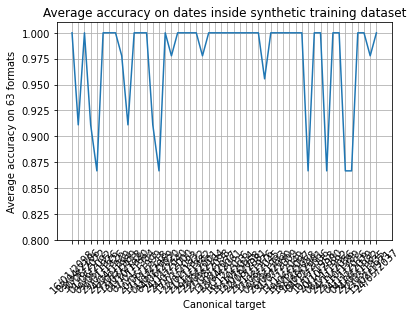

In [127]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([0.8, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates inside synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

## Below dataset

Dates lower than the synthetic dataset used for test and eval.

In [128]:
accs = []
dates = []

new_dataset = DateTextGenerator('01/01/1900','31/12/1920')

new_df = new_dataset.generate_date_dataset()
sampled_test = sample(list(new_df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['21/11/1910', '17/03/1902', '17/10/1901', '07/11/1903', '07/01/1919', '09/10/1910', '16/06/1913', '16/02/1918', '09/06/1915', '02/08/1900', '15/08/1918', '02/10/1920', '27/11/1909', '29/01/1904', '18/02/1911', '27/10/1903', '21/10/1910', '06/05/1912', '23/02/1905', '31/01/1908', '05/01/1918', '17/08/1918', '05/02/1903', '17/05/1909', '10/08/1919', '02/08/1908', '12/05/1901', '27/09/1906', '05/08/1910', '26/11/1910', '21/07/1909', '05/03/1907', '14/02/1919', '22/11/1913', '29/04/1901', '03/09/1903', '23/08/1903', '20/09/1919', '18/08/1905', '19/05/1914', '22/04/1918', '04/12/1906', '03/06/1906', '10/08/1917', '29/03/1909', '09/05/1916', '27/08/1909', '19/08/1907', '12/03/1914', '15/04/1908']


Average of average accuracies:  0.7826666666666666


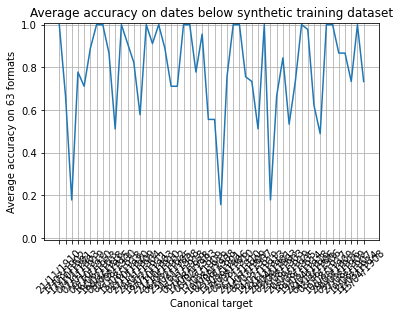

In [129]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([-0.01, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates below synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

## Above dataset

Dates greater than the synthetic dataset used for test and eval.

In [130]:
accs = []
dates = []

new_dataset = DateTextGenerator('01/01/2121','31/12/2140')


new_df = new_dataset.generate_date_dataset()
sampled_test = sample(list(new_df['Target'].values),50)

print('acc test set: ',sampled_test)

for date_sample in sampled_test:
  accs.append(evaluate_for_a_same_date(date_sample,verbose=False))
  dates.append(date_sample)
  

acc test set:  ['16/01/2130', '23/09/2139', '30/10/2131', '21/05/2138', '25/08/2137', '21/05/2130', '03/08/2136', '16/06/2129', '06/01/2133', '17/02/2123', '03/12/2125', '28/11/2128', '08/01/2129', '31/03/2121', '01/11/2124', '06/07/2128', '01/10/2132', '17/02/2131', '20/09/2131', '11/03/2123', '02/04/2133', '20/05/2130', '22/03/2132', '11/10/2125', '17/05/2128', '18/10/2134', '23/07/2132', '22/06/2136', '03/08/2125', '24/12/2128', '22/09/2127', '13/09/2138', '01/08/2138', '19/04/2135', '15/05/2126', '20/05/2122', '16/06/2131', '21/09/2124', '10/02/2135', '05/03/2132', '23/07/2122', '28/04/2125', '02/12/2137', '16/05/2129', '17/01/2128', '24/04/2130', '16/03/2136', '26/08/2122', '22/12/2132', '29/12/2132']


Average of average accuracies:  0.6857777777777778


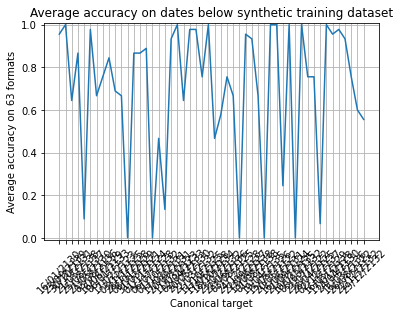

In [131]:
plt.plot(dates,accs)
plt.xticks(rotation=45)
plt.grid()
plt.ylim([-0.01, 1.01])
plt.ylabel('Average accuracy on 63 formats')
plt.xlabel('Canonical target')
plt.title('Average accuracy on dates above synthetic training dataset')
print('Average of average accuracies: ',np.mean(accs))

# The End